# #1: UNDERSTANDING THE PROBLEM STATEMENT & USE CASE

## Problem Statement: Predicting the used car prices by discovering the features which affect the price.

## Use Case: This Project can be used by car dealers or companies like CARS24 & SPINNY to predict used car prices and understand the key factors involved in the same.

# #2: IMPORTING & INSTALLING REQUIRED LIBRARIES/DATASETS 

In [2]:
!pip install xgboost
!pip install plotly

In [3]:
import numpy as np                                                          # Using mutli-dimensional array objects                                                                
import pandas as pd                                                         # Data Manipulation
import seaborn as sns                                                       # Data Visualization
import matplotlib.pyplot as plt                                             # Data Visualization 
import plotly.express as px                                                 # Interacative Data Visualization 
from jupyterthemes import jtplot                                            # Jupyter Notebook Theme
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot  # Offline version of the Plotly modules
import warnings                                                             # Ignoring the warnings 
warnings.filterwarnings("ignore") 
from sklearn.model_selection import train_test_split                        # Machine Learning
import plotly.io as pio
pio.renderers.default='notebook'

In [4]:
df = pd.read_csv("cars_data.csv")

In [5]:
df.head(5)

Make           Model   Type Origin DriveTrain     MSRP  Invoice  \
0  Acura             MDX    SUV   Asia        All  $36,945  $33,337   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820  $21,761   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990  $24,647   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195  $30,299   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755  $39,014   

   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0         3.5        6.0         265        17           23    4451   
1         2.0        4.0         200        24           31    2778   
2         2.4        4.0         200        22           29    3230   
3         3.2        6.0         270        20           28    3575   
4         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197

In [6]:
df.tail(5)

Make                    Model   Type  Origin DriveTrain     MSRP  \
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210   
426  Volvo                      V40  Wagon  Europe      Front  $26,135   
427  Volvo                     XC70  Wagon  Europe        All  $35,145   

     Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
423  $38,203         2.4        5.0         197        21           28   
424  $40,083         2.3        5.0         242        20           26   
425  $42,573         2.9        6.0         268        19           26   
426  $24,641         1.9        4.0         170        22           29   
427  $33,112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  
423    3450        105     186  
424    3450        105     186  
425    3653        110     190  
426    2822        101     180  
427    3823        109     186

# #3: EDA

In [7]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [8]:
df.shape

(428, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [10]:
# Converting MSRP and Invoice to integer datatype by removing $ & (,)
df["MSRP"] = df["MSRP"].str.replace("$", "")
df["MSRP"] = df["MSRP"].str.replace(",", "")
df["MSRP"] = df["MSRP"].astype(int)
df["Invoice"] = df["Invoice"].str.replace("$", "")
df["Invoice"] = df["Invoice"].str.replace(",", "")
df["Invoice"] = df["Invoice"].astype(int)

In [11]:
df.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   Invoice      428 non-null    int64  
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 50.3+ KB


In [13]:
round(df.describe(),2)

MSRP    Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
count     428.00     428.00      428.00     426.00      428.00    428.00   
mean    32774.86   30014.70        3.20       5.81      215.89     20.06   
std     19431.72   17642.12        1.11       1.56       71.84      5.24   
min     10280.00    9875.00        1.30       3.00       73.00     10.00   
25%     20334.25   18866.00        2.38       4.00      165.00     17.00   
50%     27635.00   25294.50        3.00       6.00      210.00     19.00   
75%     39205.00   35710.25        3.90       6.00      255.00     21.25   
max    192465.00  173560.00        8.30      12.00      500.00     60.00   

       MPG_Highway   Weight  Wheelbase  Length  
count       428.00   428.00     428.00  428.00  
mean         26.84  3577.95     108.15  186.36  
std           5.74   758.98       8.31   14.36  
min          12.00  1850.00      89.00  143.00  
25%          24.00  3104.00     103.00  178.00  
50%          26.00  3474.50     107.00  187.00  
75%          29.00  3977.75     112.00  194.00  
max          66.00  7190.00     144.00  238.00

In [14]:
#checking duplicates
df.duplicated().sum()

0

In [15]:
#checking no. of null values in each column
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [16]:
#checking % of null values in each column
df.isnull().sum() * 100 / len(df)

Make           0.00000
Model          0.00000
Type           0.00000
Origin         0.00000
DriveTrain     0.00000
MSRP           0.00000
Invoice        0.00000
EngineSize     0.00000
Cylinders      0.46729
Horsepower     0.00000
MPG_City       0.00000
MPG_Highway    0.00000
Weight         0.00000
Wheelbase      0.00000
Length         0.00000
dtype: float64

In [17]:
#handling null values by dropping them since they are extremely less
df = df.dropna()

In [18]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

# #4.1: Univariate Analysis

In [19]:
df.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [20]:
fig = px.histogram(df, x = "Make",labels = {"Make":"Manufacturer"},title = "MAKE OF THE CAR",color_discrete_sequence = ["blue"])
fig.show("notebook")

In [21]:
df.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [22]:
fig = px.histogram(df, x = "Type",labels = {"Type":"Type"},title = "TYPE OF THE CAR",color_discrete_sequence = ["green"])           
fig.show()

In [23]:
df.Origin.unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [24]:
fig = px.histogram(df, x = "Origin",labels = {"Origin":"Origin"},title = "LOCATION OF THE CAR SALES",color_discrete_sequence = ["orange"])     
fig.show()

In [25]:
df.DriveTrain.unique()

array(['All', 'Front', 'Rear'], dtype=object)

In [26]:
fig = px.histogram(df, x = "DriveTrain",labels = {"DriveTrain":"Drivetrain"},title = "DRIVE TRAIN OF THE CAR",color_discrete_sequence = ["red"])
fig.show()

In [27]:
fig = px.violin(df, x = "EngineSize",labels = {"EngineSize":"EngineSize"},title = "ENGINE SIZE OF THE CARS",color_discrete_sequence = ["purple"])
fig.show()

In [28]:
fig = px.violin(df, x = "Cylinders",labels = {"Cylinders":"Cylinders"},title = "CYLINDERS OF THE CARS",color_discrete_sequence = ["blue"])
fig.show()

In [29]:
fig = px.violin(df, x = "Horsepower",labels = {"Horsepower":"Horsepower"},title = "HORSEPOWER OF THE CARS",color_discrete_sequence = ["green"])
fig.show()

In [30]:
fig = px.violin(df, x = "MPG_City",labels = {"MPG_City":"MPG_City"},title = "MPG in City OF THE CARS",color_discrete_sequence = ["yellow"])
fig.show()

In [31]:
fig = px.violin(df, x = "MPG_Highway",labels = {"MPG_Highway":"MPG_Highway"},title = "MPG IN HIGHWAY OF THE CARS",color_discrete_sequence = ["orange"])
fig.show()

In [32]:
fig = px.violin(df, x = "Weight",labels = {"Weight":"Weight"},title = "WEIGHT OF THE CAR",color_discrete_sequence = ["red"])
fig.show()

In [33]:
fig = px.violin(df, x = "Length",labels = {"Length":"Length"},title ="LENGTH OF THE CARS",color_discrete_sequence = ["purple"])
fig.show()

In [34]:
fig = px.box(df, x = "MSRP",labels = {"MSRP":"MSRP"},title ="MSRP OF THE CARS",color_discrete_sequence = ["blue"])
fig.show()

In [35]:
fig = px.box(df, x = "Invoice",labels = {"Invoice":"Invoice"},title ="INVOICE OF THE CARS",color_discrete_sequence = ["green"])
fig.show()

Univariate Analysis: 
1. There are 38 car manufactures in which Toyota has maximum cars while Hummer has least.
2. There are 6 Types of Cars in which Sedan type is maximum(more than the cumulative sum of other types) while Hybrid type is the least.
3. The 3 Origins of all cars: ASIA, EUROPE & USA. 
4. As expected Mileage Per Gallon of cars in Highways is more than that of Cities.
5. The majority of MSRP lies in range of 10.28k-65k. There are certain outliers too.

# 4.2: Bivariate Analysis

In [36]:
fig = px.histogram(df, x = "Make",color = "Origin",labels = {"Make":"Manufacturer"},title = "MAKE OF THE CAR Vs LOCATION",)                
fig.show()

In [37]:
fig = px.histogram(df, x = "Make",color = "Type",labels = {"Make":"Manufacturer"},title = "MAKE OF THE CAR Vs TYPE")                  
fig.show()

In [38]:
# Plot the make of the car and its location
fig = px.histogram(df, x = "Type",color = "Origin",labels = {"Make":"Manufacturer"},title = "TYPE OF THE CAR Vs LOCATION")
fig.show()

In [39]:
# Plot the make of the car and its location
fig = px.histogram(df, x = "Type",color = "DriveTrain",labels = {"Make":"Manufacturer"},title = "TYPE OF THE CAR Vs DriveTrain")
fig.show()

In [40]:
# Plot the make of the car and its location
fig = px.histogram(df, x = "Origin",color = "DriveTrain",labels = {"Make":"Manufacturer"},title = "Location OF THE CAR Vs DriveTrain")
fig.show()

<AxesSubplot:>

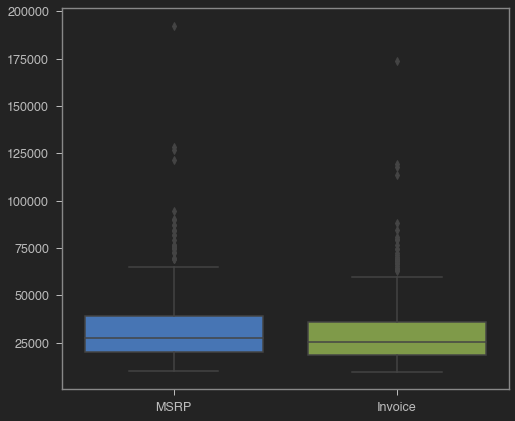

In [41]:
df_MSRP_Invoice=df[["MSRP","Invoice"]]
sns.boxplot(data=df_MSRP_Invoice)

Bivariate Analysis:
1. Hybrid cars have been manufactured only in ASIA by Honda & Toyota.
2. Porsche manufactures most Sports cars(88% of all cars they manufacture).
3. There are no manufactures of Trucks in Europe.
4. The values of MSRP and Invoice are highly coorelated. Thus Invoice can be dropped before applying ML model.

#   # 4.3: Multivariate Analysis

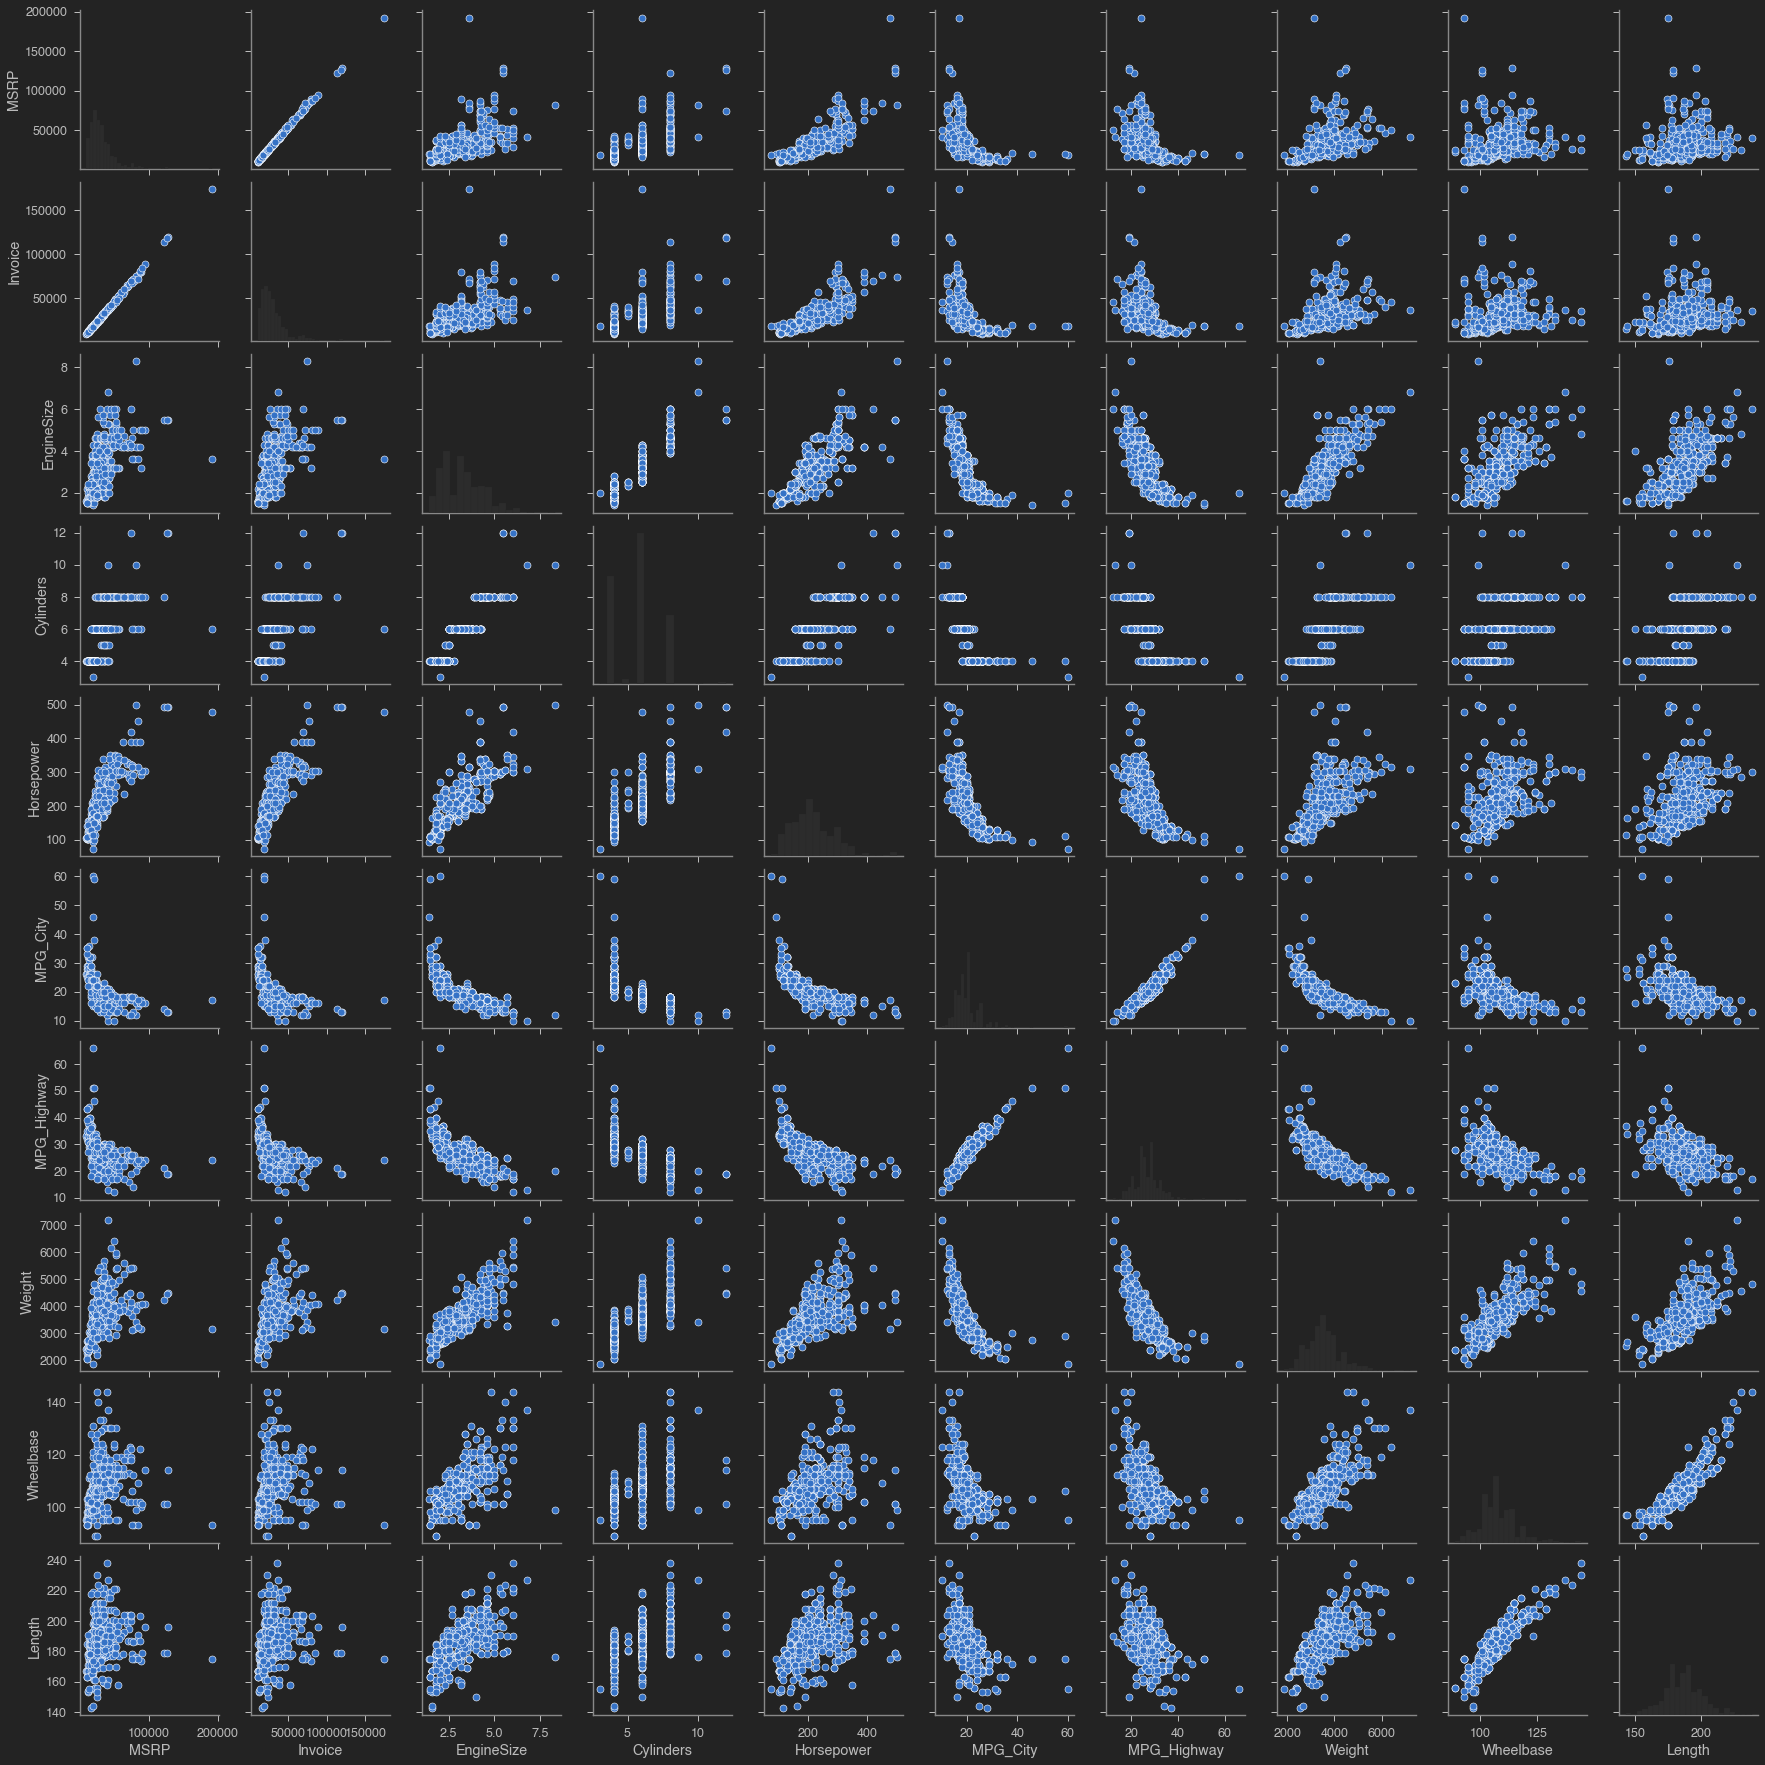

In [42]:
sns.pairplot(data = df) 

In [43]:
round(df.corr(),2)

MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
MSRP         1.00     1.00        0.57       0.65        0.83     -0.48   
Invoice      1.00     1.00        0.57       0.65        0.82     -0.47   
EngineSize   0.57     0.57        1.00       0.91        0.79     -0.72   
Cylinders    0.65     0.65        0.91       1.00        0.81     -0.68   
Horsepower   0.83     0.82        0.79       0.81        1.00     -0.68   
MPG_City    -0.48    -0.47       -0.72      -0.68       -0.68      1.00   
MPG_Highway -0.44    -0.44       -0.73      -0.68       -0.65      0.94   
Weight       0.45     0.44        0.81       0.74        0.63     -0.74   
Wheelbase    0.15     0.15        0.64       0.55        0.39     -0.51   
Length       0.17     0.17        0.64       0.55        0.38     -0.50   

             MPG_Highway  Weight  Wheelbase  Length  
MSRP               -0.44    0.45       0.15    0.17  
Invoice            -0.44    0.44       0.15    0.17  
EngineSize         -0.73    0.81       0.64    0.64  
Cylinders          -0.68    0.74       0.55    0.55  
Horsepower         -0.65    0.63       0.39    0.38  
MPG_City            0.94   -0.74      -0.51   -0.50  
MPG_Highway         1.00   -0.79      -0.53   -0.47  
Weight             -0.79    1.00       0.76    0.69  
Wheelbase          -0.53    0.76       1.00    0.89  
Length             -0.47    0.69       0.89    1.00

<AxesSubplot:>

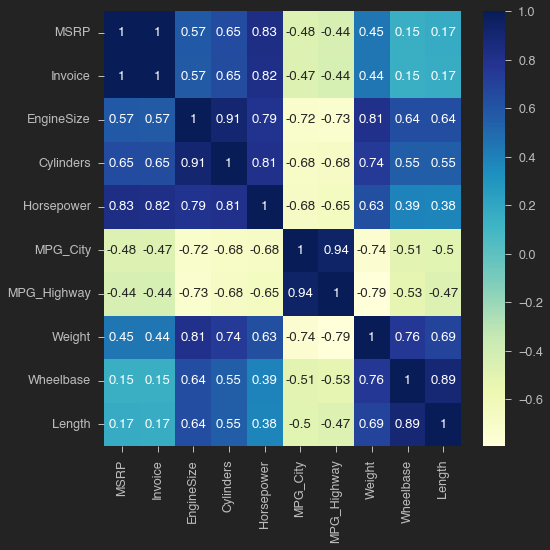

In [44]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)

In [45]:
fig = px.scatter_3d(df, x='Make', y='Type', z='DriveTrain',color='Origin')
fig.show()

Multivariate Analysis: MSRP has highest positive coorelation with HORSEPOWER.

# # 5: PREPARING THE DATA FOR MODEL TRAINING

In [45]:
df.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [46]:
# Performing One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"
df_dum = pd.get_dummies(df, columns=["Make", "Model", "Type", "Origin", "DriveTrain"])

In [47]:
df_dum

MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
0    36945    33337         3.5        6.0         265        17           23   
1    23820    21761         2.0        4.0         200        24           31   
2    26990    24647         2.4        4.0         200        22           29   
3    33195    30299         3.2        6.0         270        20           28   
4    43755    39014         3.5        6.0         225        18           24   
..     ...      ...         ...        ...         ...       ...          ...   
423  40565    38203         2.4        5.0         197        21           28   
424  42565    40083         2.3        5.0         242        20           26   
425  45210    42573         2.9        6.0         268        19           26   
426  26135    24641         1.9        4.0         170        22           29   
427  35145    33112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  ...  Type_Sedan  Type_Sports  Type_Truck  \
0      4451        106     189  ...           0            0           0   
1      2778        101     172  ...           1            0           0   
2      3230        105     183  ...           1            0           0   
3      3575        108     186  ...           1            0           0   
4      3880        115     197  ...           1            0           0   
..      ...        ...     ...  ...         ...          ...         ...   
423    3450        105     186  ...           1            0           0   
424    3450        105     186  ...           1            0           0   
425    3653        110     190  ...           1            0           0   
426    2822        101     180  ...           0            0           0   
427    3823        109     186  ...           0            0           0   

     Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  DriveTrain_All  \
0             0            1              0           0               1   
1             0            1              0           0               0   
2             0            1              0           0               0   
3             0            1              0           0               0   
4             0            1              0           0               0   
..          ...          ...            ...         ...             ...   
423           0            0              1           0               0   
424           0            0              1           0               0   
425           0            0              1           0               0   
426           1            0              1           0               0   
427           1            0              1           0               1   

     DriveTrain_Front  DriveTrain_Rear  
0                   0                0  
1                   1                0  
2                   1                0  
3                   1                0  
4                   1                0  
..                ...              ...  
423                 1                0  
424                 1                0  
425                 1                0  
426                 1                0  
427                 0                0  

[426 rows x 483 columns]

In [48]:
df_data = df_dum.drop(["Invoice"], axis = 1)
# Invoice feature do not contribute to car price prediction 

In [49]:
df_data

MSRP  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0    36945         3.5        6.0         265        17           23    4451   
1    23820         2.0        4.0         200        24           31    2778   
2    26990         2.4        4.0         200        22           29    3230   
3    33195         3.2        6.0         270        20           28    3575   
4    43755         3.5        6.0         225        18           24    3880   
..     ...         ...        ...         ...       ...          ...     ...   
423  40565         2.4        5.0         197        21           28    3450   
424  42565         2.3        5.0         242        20           26    3450   
425  45210         2.9        6.0         268        19           26    3653   
426  26135         1.9        4.0         170        22           29    2822   
427  35145         2.5        5.0         208        20           27    3823   

     Wheelbase  Length  Make_Acura  ...  Type_Sedan  Type_Sports  Type_Truck  \
0          106     189           1  ...           0            0           0   
1          101     172           1  ...           1            0           0   
2          105     183           1  ...           1            0           0   
3          108     186           1  ...           1            0           0   
4          115     197           1  ...           1            0           0   
..         ...     ...         ...  ...         ...          ...         ...   
423        105     186           0  ...           1            0           0   
424        105     186           0  ...           1            0           0   
425        110     190           0  ...           1            0           0   
426        101     180           0  ...           0            0           0   
427        109     186           0  ...           0            0           0   

     Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  DriveTrain_All  \
0             0            1              0           0               1   
1             0            1              0           0               0   
2             0            1              0           0               0   
3             0            1              0           0               0   
4             0            1              0           0               0   
..          ...          ...            ...         ...             ...   
423           0            0              1           0               0   
424           0            0              1           0               0   
425           0            0              1           0               0   
426           1            0              1           0               0   
427           1            0              1           0               1   

     DriveTrain_Front  DriveTrain_Rear  
0                   0                0  
1                   1                0  
2                   1                0  
3                   1                0  
4                   1                0  
..                ...              ...  
423                 1                0  
424                 1                0  
425                 1                0  
426                 1                0  
427                 0                0  

[426 rows x 482 columns]

In [50]:
# Feeding input features to X and output (MSRP) to y
X = df_data.drop("MSRP", axis = 1)
y = df_data["MSRP"]

In [51]:
X = np.array(X)

In [52]:
y = np.array(y)

In [53]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)

In [281]:
df_data.shape

(426, 482)

In [282]:
X_train.shape

(340, 481)

In [283]:
X_test.shape

(86, 481)

In [337]:
y_train.shape

(340,)

In [338]:
y_test.shape

(86,)

# # 5: PREPARING THE DATA FOR MODEL TRAINING

In [272]:
df.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [273]:
# Performing One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"
df_dum = pd.get_dummies(df, columns=["Make", "Model", "Type", "Origin", "DriveTrain"])

In [274]:
df_dum

MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
0    36945    33337         3.5        6.0         265        17           23   
1    23820    21761         2.0        4.0         200        24           31   
2    26990    24647         2.4        4.0         200        22           29   
3    33195    30299         3.2        6.0         270        20           28   
4    43755    39014         3.5        6.0         225        18           24   
..     ...      ...         ...        ...         ...       ...          ...   
423  40565    38203         2.4        5.0         197        21           28   
424  42565    40083         2.3        5.0         242        20           26   
425  45210    42573         2.9        6.0         268        19           26   
426  26135    24641         1.9        4.0         170        22           29   
427  35145    33112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  ...  Type_Sedan  Type_Sports  Type_Truck  \
0      4451        106     189  ...           0            0           0   
1      2778        101     172  ...           1            0           0   
2      3230        105     183  ...           1            0           0   
3      3575        108     186  ...           1            0           0   
4      3880        115     197  ...           1            0           0   
..      ...        ...     ...  ...         ...          ...         ...   
423    3450        105     186  ...           1            0           0   
424    3450        105     186  ...           1            0           0   
425    3653        110     190  ...           1            0           0   
426    2822        101     180  ...           0            0           0   
427    3823        109     186  ...           0            0           0   

     Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  DriveTrain_All  \
0             0            1              0           0               1   
1             0            1              0           0               0   
2             0            1              0           0               0   
3             0            1              0           0               0   
4             0            1              0           0               0   
..          ...          ...            ...         ...             ...   
423           0            0              1           0               0   
424           0            0              1           0               0   
425           0            0              1           0               0   
426           1            0              1           0               0   
427           1            0              1           0               1   

     DriveTrain_Front  DriveTrain_Rear  
0                   0                0  
1                   1                0  
2                   1                0  
3                   1                0  
4                   1                0  
..                ...              ...  
423                 1                0  
424                 1                0  
425                 1                0  
426                 1                0  
427                 0                0  

[426 rows x 483 columns]

In [275]:
df_data = df_dum.drop(["Invoice"], axis = 1)
# Invoice feature do not contribute to car price prediction 

In [276]:
df_data

MSRP  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0    36945         3.5        6.0         265        17           23    4451   
1    23820         2.0        4.0         200        24           31    2778   
2    26990         2.4        4.0         200        22           29    3230   
3    33195         3.2        6.0         270        20           28    3575   
4    43755         3.5        6.0         225        18           24    3880   
..     ...         ...        ...         ...       ...          ...     ...   
423  40565         2.4        5.0         197        21           28    3450   
424  42565         2.3        5.0         242        20           26    3450   
425  45210         2.9        6.0         268        19           26    3653   
426  26135         1.9        4.0         170        22           29    2822   
427  35145         2.5        5.0         208        20           27    3823   

     Wheelbase  Length  Make_Acura  ...  Type_Sedan  Type_Sports  Type_Truck  \
0          106     189           1  ...           0            0           0   
1          101     172           1  ...           1            0           0   
2          105     183           1  ...           1            0           0   
3          108     186           1  ...           1            0           0   
4          115     197           1  ...           1            0           0   
..         ...     ...         ...  ...         ...          ...         ...   
423        105     186           0  ...           1            0           0   
424        105     186           0  ...           1            0           0   
425        110     190           0  ...           1            0           0   
426        101     180           0  ...           0            0           0   
427        109     186           0  ...           0            0           0   

     Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  DriveTrain_All  \
0             0            1              0           0               1   
1             0            1              0           0               0   
2             0            1              0           0               0   
3             0            1              0           0               0   
4             0            1              0           0               0   
..          ...          ...            ...         ...             ...   
423           0            0              1           0               0   
424           0            0              1           0               0   
425           0            0              1           0               0   
426           1            0              1           0               0   
427           1            0              1           0               1   

     DriveTrain_Front  DriveTrain_Rear  
0                   0                0  
1                   1                0  
2                   1                0  
3                   1                0  
4                   1                0  
..                ...              ...  
423                 1                0  
424                 1                0  
425                 1                0  
426                 1                0  
427                 0                0  

[426 rows x 482 columns]

In [277]:
# Feeding input features to X and output (MSRP) to y
X = df_data.drop("MSRP", axis = 1)
y = df_data["MSRP"]

In [278]:
X = np.array(X)

In [279]:
y = np.array(y)

In [280]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)

In [281]:
df_data.shape

(426, 482)

In [282]:
X_train.shape

(340, 481)

In [283]:
X_test.shape

(86, 481)

In [337]:
y_train.shape

(340,)

In [338]:
y_test.shape

(86,)

# # 6.1: TRAINING AND EVALUATING MULTIPLE LINEAR REGRESSION

In [284]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [285]:
LinearRegression_model= LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [286]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8432973844392416

In [349]:
print("ACCURACY of Multiple Linear Regression: ",round(accuracy_LinearRegression*100,2),"%")

ACCURACY of Multiple Linear Regression:  84.33 %


# # 6.2: TRAINING AND EVALUATING DECISION TREE

In [287]:
from sklearn.tree import DecisionTreeRegressor

DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [288]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.8825769736325962

In [350]:
print("ACCURACY of Decision Tree:",round(accuracy_DecisionTree*100,2),"%")

ACCURACY of Decision Tree: 88.26 %


# # 6.3: TRAINING AND EVALUATING RANDOM FOREST REGRESSION

In [289]:
from sklearn.ensemble import RandomForestRegressor

In [290]:
RandomForest_model = RandomForestRegressor(n_estimators= 5, max_depth= 5)
RandomForest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [291]:
accuracy_RandomForest= RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.8431022604395081

In [351]:
print("ACCURACY of Random Forest Regression:",round(accuracy_RandomForest*100,2),"%")

ACCURACY of Random Forest Regression: 84.31 %


# # 6.4: TRAINING AND EVALUATING XGBOOST ALGORITHM

In [292]:
from xgboost import XGBRegressor

In [293]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [294]:
accuracy_XGBoost = model.score(X_test, y_test)
accuracy_XGBoost

0.9368475564239244

In [352]:
print("ACCURACY of XGBOOST Algorithm:",round(accuracy_XGBoost*100,2),"%")

ACCURACY of XGBOOST Algorithm: 93.68 %


# # 7: COMPARING MODELS AND CALCULATING REGRESSION KPIs

[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

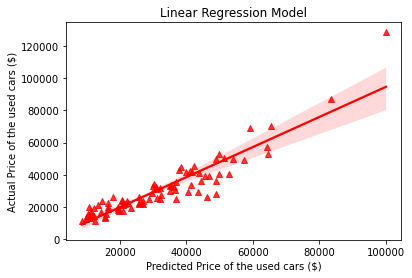

In [295]:
y_predict_linear = LinearRegression_model.predict(X_test)

fig = sns.regplot(y_predict_linear, y_test, color = 'red', marker = "^")
fig.set(title = "Linear Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [296]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_linear)
MAE= mean_absolute_error(y_test, y_predict_linear)
r2= r2_score(y_test, y_predict_linear)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 6976.547 
MSE = 48672211.62598064 
MAE = 5060.856301243534 
R2 = 0.8432973844392416


[Text(0.5, 1.0, 'Random Forest Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

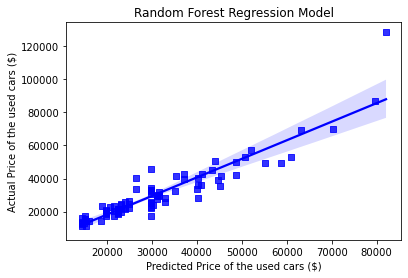

In [297]:
y_predict_RandomForest = RandomForest_model.predict(X_test)

fig = sns.regplot(y_predict_RandomForest, y_test, color = 'blue', marker = "s")
fig.set(title = "Random Forest Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel= "Actual Price of the used cars ($)")

In [298]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_RandomForest)
MAE= mean_absolute_error(y_test, y_predict_RandomForest)
r2= r2_score(y_test, y_predict_RandomForest)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 6980.889 
MSE = 48732817.6125135 
MAE = 4217.669264831376 
R2 = 0.8431022604395081


[Text(0.5, 1.0, 'XGBoost Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

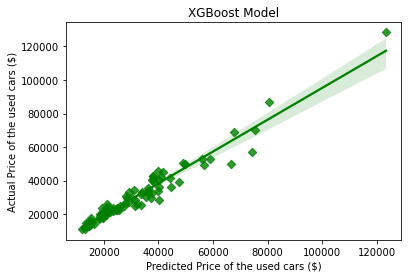

In [299]:
y_predict_XGBoost = model.predict(X_test)

fig = sns.regplot(y_predict_XGBoost, y_test, color = 'green', marker = "D")
fig.set(title = "XGBoost Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [300]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost)), ".3f"))
MSE = mean_squared_error(y_test, y_predict_XGBoost)
MAE = mean_absolute_error(y_test, y_predict_XGBoost)
r2 = r2_score(y_test, y_predict_XGBoost)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 4428.917 
MSE = 19615301.80867185 
MAE = 3039.6424305050873 
R2 = 0.9368475564239244


# # 8: CONCLUSION

## XGBoost model scores 94% accuracy which clearly outperforms the Multiple Linear Regression(84%), Decision Tree(88%) and Random Forest Regression(84%) models.